In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
cv_path = r'../Model prework/cv_results.pickle'
with open(cv_path, 'rb') as file:
    cv_results = pickle.load(file)
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   split0_test_score            50 non-null     float64
 1   split1_test_score            50 non-null     float64
 2   split2_test_score            50 non-null     float64
 3   split3_test_score            50 non-null     float64
 4   split4_test_score            50 non-null     float64
 5   mean_test_score              50 non-null     float64
 6   std_test_score               50 non-null     float64
 7   rank_test_score              50 non-null     int64  
 8   split0_train_score           50 non-null     float64
 9   split1_train_score           50 non-null     float64
 10  split2_train_score           50 non-null     float64
 11  split3_train_score           50 non-null     float64
 12  split4_train_score           50 non-null     float64
 13  mean_train_score      

In [3]:
cv_results[['rank_test_score',
            'mean_train_score',
            'mean_test_score',
            'param_criterion',
            'param_max_depth',
            'param_max_features',
            'param_min_impurity_decrease',
            'param_min_samples_leaf',
            'param_n_estimators'
           ]].sort_values('rank_test_score', ascending=True)[:10].to_markdown()

'|    |   rank_test_score |   mean_train_score |   mean_test_score | param_criterion   |   param_max_depth |   param_max_features |   param_min_impurity_decrease |   param_min_samples_leaf |   param_n_estimators |\n|---:|------------------:|-------------------:|------------------:|:------------------|------------------:|---------------------:|------------------------------:|-------------------------:|---------------------:|\n| 15 |                 1 |           0.168007 |          0.167353 | entropy           |                48 |                    1 |                             0 |                        3 |                   27 |\n| 17 |                 2 |           0.168014 |          0.167288 | gini              |                47 |                    9 |                             0 |                        3 |                   30 |\n| 28 |                 3 |           0.167972 |          0.167255 | entropy           |                44 |                    8 |             

In [4]:
{
    'criterion':['gini','entropy'],
    'max_depth':np.linspace(0,50,51),
    'min_samples_leaf':np.linspace(1,10,10),
    'n_estimators':np.linspace(1,100,100),
    'class_weight': ['balanced'],
    'max_features':[None,1,2,3,4,5,6,7,8,9,10],
    'min_impurity_decrease':np.linspace(0,0.25,6),
    'random_state': [42],
    'n_jobs':[-1],
    'verbose':[2]
}


{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 'min_samples_leaf': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 'n_estimators': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,

| Hyperparameter | Levels |
| :--- | :---: |
| Criterion | Gini, entropy |
| Max depth | Integers 0-50 |
| Min samples leaf | Integers 1-10 |
| N estimators | Integers 1-100 |
| Max features | "None" and integers 1-10 |
| Min impurity decrease | 0, 0.05, 0.1, 0.15, 0.2, 0.25 |

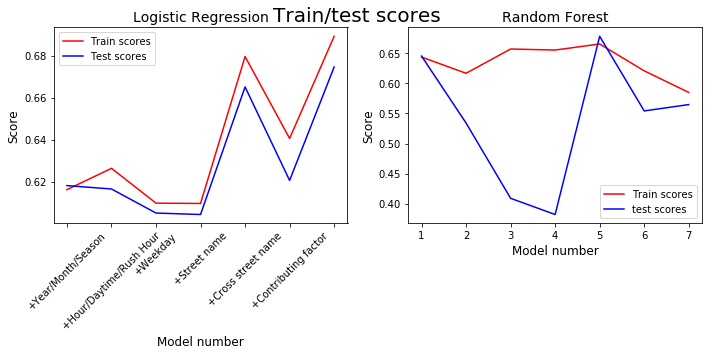

In [14]:
model_number = [1,2,3,4,5,6,7]

lr_train_scores = [0.61629,0.62645,0.60990,0.60974,0.67963,0.64065,0.68923]
lr_test_scores = [0.61824,0.61663,0.60519,0.60449,0.66516,0.62070,0.67461]

rf_train_scores = [0.64351,0.61663,0.65685,0.65514,0.66516,0.62070,0.58489]
rf_test_scores = [0.64517,0.53417,0.40945,0.38259,0.6779,0.55425,0.56477]

labels = 'Boroughs/location clusters,+Year/Month/Season,+Hour/Daytime/Rush Hour,+Weekday,+Street name,+Cross street name,+Contributing factor'.split(',')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(model_number, lr_train_scores, 'r', label='Train scores')
ax1.plot(model_number, lr_test_scores, 'b', label='Test scores')
ax1.legend()
ax1.set_title('Logistic Regression', fontsize=14)
ax1.set_xlabel('Features added', fontsize=12)
ax1.set_xticklabels(labels, rotation=45)
ax1.set_ylabel('Score', fontsize=12)
ax2.plot(model_number, rf_train_scores, 'r', label='Train scores')
ax2.plot(model_number, rf_test_scores, 'b', label='test scores')
ax2.legend()
ax2.set_title('Random Forest', fontsize=14)
ax2.set_xlabel('Features added', fontsize=12)
ax2.set_xticklabels(labels, rotation=45)
ax2.set_ylabel('Score', fontsize=12)
plt.suptitle('Train/test scores', fontsize=20)
plt.tight_layout()
plt.savefig('Scores.png')
plt.show()